In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
sns.set_style("darkgrid")

import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 10

import plotly.graph_objects as go
import plotly.express as px

import pickle
import os
import gc

os.chdir("./제6회 L.POINT Big Data Competition/")

def resumetable(df):
    print(f"DataSet Shape : {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns={'dtypes'})
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name","dtypes"]]
    summary['Missing'] = df.isnull().sum().values
    summary['Unique'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, "Entropy"] = round(stats.entropy(df[name].value_counts(normalize = True), base=2),2)
        
    return summary

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

online_df = pd.read_csv("merged_onilne_df.csv")
online_df = reduce_mem_usage(online_df)
online_df['time'] = pd.to_datetime(online_df.time)
online_df['hit_pss_tm'] = online_df.hit_pss_tm // 1000

Mem. usage decreased to 405.38 Mb (45.8% reduction)


In [2]:
online_df

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,1,1,1,0,A01,20190911,16:14,11,NaN,과일선물세트,...,14,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
1,1,1,2,0,A01,20190911,16:15,22,NaN,과일선물세트 백화점,...,15,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
2,1,1,3,0,A01,20190911,16:15,36,NaN,과일바구니,...,15,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
3,1,2,1,0,A01,20190922,14:09,41,NaN,초등가을잠바,...,9,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
4,1,2,2,0,A01,20190922,14:10,56,NaN,초등가을점퍼,...,10,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
5,1,2,3,0,A01,20190922,14:10,70,NaN,초등남아옷,...,10,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
6,1,2,4,0,A01,20190922,14:11,119,NaN,초등남아점퍼,...,11,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
7,1,2,5,0,A01,20190922,14:11,162,NaN,노스페이스키즈,...,11,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
8,1,2,6,0,A01,20190922,14:12,178,NaN,노스페이스초등,...,12,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
9,1,2,7,0,A01,20190922,14:12,192,NaN,노스페이스키즈,...,12,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN


### 소비패턴 생성

* 소비패턴  
  * 주 구매상품 카테고리   
  * 구매시 장바구니 사용 정도
  * 

#### 구매시 장바구니 사용 정도 

In [4]:
with open("buying_sess_list.pickle", "rb") as f:
    buying_sess_list = pickle.load(f)

In [9]:
tmp_df = online_df.drop_duplicates(["clnt_id","sess_id"], keep = "first").reset_index(drop = True)[["clnt_id","sess_id"]]

In [10]:
tmp_df["buying_sess"] = buying_sess_list

In [12]:
# tmp_df.to_csv("buying_sess_df.csv", index = False)

In [15]:
tmp = online_df.merge(tmp_df, how = "left", on = ["clnt_id","sess_id"])

In [21]:
tmp[tmp.buying_sess == 1].groupby(["clnt_id","sess_id","action_type"]).size().reset_index()[tmp[tmp.buying_sess == 1].groupby(["clnt_id","sess_id","action_type"]).size().reset_index()["clnt_id"] == 9]

,clnt_id,sess_id,action_type,0
27,9,6,0,3
28,9,6,1,3
29,9,6,2,3
30,9,6,3,3
31,9,6,5,15
32,9,6,6,9
33,9,26,1,3
34,9,26,2,6
35,9,26,3,5
36,9,26,5,11


In [25]:
pd.options.display.max_rows = 100

In [27]:
online_df[online_df.clnt_id == 9].head(100)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,time,year,month,day,weekday,hour,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
340,9,1,1,3,A03,20190701,13:55,46,NaN,NaN,5.0,142.0,DIRECT,NaN,2019-07-01 13:55:00,2019,7,1,0,13,55,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
341,9,1,2,3,A03,20190701,13:55,83,NaN,NaN,5.0,142.0,DIRECT,NaN,2019-07-01 13:55:00,2019,7,1,0,13,55,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
342,9,1,3,3,A03,20190701,13:56,97,NaN,NaN,5.0,142.0,DIRECT,NaN,2019-07-01 13:56:00,2019,7,1,0,13,56,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
343,9,1,4,3,A03,20190701,13:56,101,NaN,NaN,5.0,142.0,DIRECT,NaN,2019-07-01 13:56:00,2019,7,1,0,13,56,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
344,9,1,5,3,A03,20190701,13:56,101,NaN,NaN,5.0,142.0,DIRECT,NaN,2019-07-01 13:56:00,2019,7,1,0,13,56,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
345,9,1,6,3,A03,20190701,13:56,142,NaN,NaN,5.0,142.0,DIRECT,NaN,2019-07-01 13:56:00,2019,7,1,0,13,56,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
346,9,2,1,5,A03,20190701,16:23,29,NaN,NaN,39.0,697.0,DIRECT,NaN,2019-07-01 16:23:00,2019,7,1,0,16,23,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
347,9,2,2,1,A03,20190701,16:24,45,NaN,NaN,39.0,697.0,DIRECT,NaN,2019-07-01 16:24:00,2019,7,1,0,16,24,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
348,9,2,3,2,A03,20190701,16:24,47,NaN,NaN,39.0,697.0,DIRECT,NaN,2019-07-01 16:24:00,2019,7,1,0,16,24,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
349,9,2,4,5,A03,20190701,16:24,49,NaN,NaN,39.0,697.0,DIRECT,NaN,2019-07-01 16:24:00,2019,7,1,0,16,24,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN


In [ ]:
# 주로 구매하는 category를 보는게 의미가 있을지? - sparse한 data가 나오지 않을지 
# 장바구니 => 한번에 여러개 사는지 / 한번에 하나씩  사는지?
#          => 장바구니 이용정도를 어떻게 볼 것인지 ( 구매, 장바구니 추가, 장바구니 삭제 이용하여 어떻게 정의?)
# 정기적으로 구매를 하는지?
# + action_type pattern이 구매로 가장 많이 이어지는지 확인

##### 장바구니 => 한번에 여러개 사는지 / 한번에 하나씩  사는지?

In [ ]:
# 한번에 여러개 => 한 세션 내에서 action_type 6(구매)가 2개 이상이나 trans_id는 1개인 경우
# 한번에 한개씩 => 한 세션내에서 action_type 6의 갯수와 trans_id의 갯수가 같은 경우

In [95]:
tmp_df2 = online_df[online_df.action_type==6][["clnt_id","sess_id","action_type","trans_id"]]

In [94]:
# tmp_df2.drop_duplicates(["clnt_id","sess_id","trans_id"], keep = 'first').groupby(["clnt_id","sess_id"]).size().reset_index().rename(columns = { 0 : "transaction_count"})

In [96]:
tmp_sub1 = tmp_df2.groupby(["clnt_id","sess_id"]).size().reset_index().rename(columns = { 0 : "item_quantities"})
tmp_sbu2 = tmp_df2.drop_duplicates(["clnt_id","sess_id","trans_id"], keep = 'first').groupby(["clnt_id","sess_id"]).size().reset_index().rename(columns = { 0 : "transaction_count"})

In [97]:
shopping_bags = tmp_sub1.merge(tmp_sbu2,)

In [98]:
shopping_bags[shopping_bags.transaction_count > 1].shape[0] / shopping_bags.shape[0]

0.13768008943826862

In [58]:
# 장바구니에 2개 이상 담은 후 한번에 결제한 비율 약 13.8%

In [60]:
buying_sess = pd.read_csv("buying_sess_df.csv")

In [75]:
tmp2 = online_df.merge(buying_sess[buying_sess.buying_sess == 1]).groupby(["clnt_id","sess_id","action_type"]).size().reset_index()

In [77]:
tmp2_sub1 = tmp2[tmp2.action_type==3]
tmp2_sub2 = tmp2[tmp2.action_type==4]

In [80]:
tmp2_sub1.rename(columns = { 0 : "add_counts"}, inplace = True)
tmp2_sub2.rename(columns = { 0 : "delete_counts"}, inplace = True)

c:\python37\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [87]:
tmp2 = tmp2_sub1.merge(tmp2_sub2, how = "outer", on = ["clnt_id","sess_id"]).drop(["action_type_x" ,"action_type_y"], axis=1)

In [90]:
tmp2['add_counts'] = tmp2.add_counts.fillna(0)
tmp2['delete_counts'] = tmp2.delete_counts.fillna(0)

In [92]:
tmp2["quantity_fluctuation"] = tmp2.add_counts - tmp2.delete_counts

In [93]:
tmp2

,clnt_id,sess_id,add_counts,delete_counts,quantity_fluctuation
0,2,1,2.0,0.0,2.0
1,2,8,7.0,2.0,5.0
2,2,10,1.0,0.0,1.0
3,2,19,4.0,0.0,4.0
4,9,6,3.0,0.0,3.0
5,9,26,5.0,0.0,5.0
6,17,3,10.0,6.0,4.0
7,24,5,18.0,2.0,16.0
8,24,15,9.0,2.0,7.0
9,38,5,5.0,5.0,0.0


In [103]:
shopping_bags = shopping_bags.merge(tmp2, how = "left").fillna(0)

In [106]:
shopping_bags.to_csv("shopping_carts.csv", index = False)

In [105]:
shopping_bags.head(50)
# item_quantities : 해당 세선에서 구매한 item 수
# transaction_count : 해당 세선에서 구매를 진행한 횟수
# add_counts : 해당 세선에서 장바구니에 추가한 item 수
# delete_counts : 해당 세선에서 장바구니 item을 삭제한 수
# quantity_fluctuatin : 해당 세선에서 장바구니 item수의 총 변동량

# ex) item_quantity==1, transaction_count==1
#    fluctuation > 1   => 장바구니에 상품 여러개 추가 후 한개만 구매 => 같은 물품 여러가지 비교 후 구매? or  다른 물품 추가 후 하나만 구매
#    fluctuation == 1 => 장바구니에 상품추가 후 장바구니를 통해 구매
#    fluctuation == 0 => 물품상세정보창에서 바로구매

,clnt_id,sess_id,item_quantities,transaction_count,add_counts,delete_counts,quantity_fluctuation
0,2,1,1,1,2.0,0.0,2.0
1,2,8,5,1,7.0,2.0,5.0
2,2,10,1,1,1.0,0.0,1.0
3,2,19,3,1,4.0,0.0,4.0
4,4,1,1,1,0.0,0.0,0.0
5,9,6,9,1,3.0,0.0,3.0
6,9,26,8,1,5.0,0.0,5.0
7,12,1,1,1,0.0,0.0,0.0
8,17,3,1,1,10.0,6.0,4.0
9,19,1,1,1,0.0,0.0,0.0


In [70]:
tmp2

,clnt_id,sess_id,action_type,counts
3,2,1,3,2
9,2,8,3,7
16,2,10,3,1
22,2,19,3,4
30,9,6,3,3
35,9,26,3,5
43,17,3,3,10
64,24,5,3,18
71,24,15,3,9
80,38,5,3,5


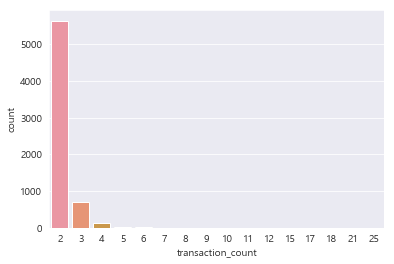

In [55]:
sns.countplot(shopping_bags[shopping_bags.transaction_count > 1].transaction_count)

In [57]:
shopping_bags[shopping_bags.transaction_count > 1].transaction_count.value_counts().reset_index().sort_values( by = "index" )

,index,transaction_count
0,2,5647
1,3,691
2,4,128
3,5,20
4,6,18
13,7,1
8,8,3
10,9,2
5,10,5
12,11,1


##### 주기적으로 구매??

In [2]:
tmp_4 = online_df[online_df.action_type == 6].drop_duplicates(["clnt_id","sess_id"], keep = "first")

In [8]:
tmp_4.groupby(["clnt_id","sess_id"]).size().reset_index().groupby(["clnt_id"]).size().reset_index()

,clnt_id,0
0,2,4
1,4,1
2,9,2
3,12,1
4,17,1
5,19,1
6,20,1
7,22,1
8,23,7
9,24,2


In [16]:
online_df[(online_df.clnt_id == 2) & (online_df.sess_id == 19)]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
235,2,19,1,2,A03,20190830,21:23,27,NaN,NaN,...,23,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
236,2,19,2,2,A03,20190830,21:24,42,NaN,NaN,...,24,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
237,2,19,3,2,A03,20190830,21:28,293,NaN,NaN,...,28,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
238,2,19,4,0,A03,20190830,21:49,1587,NaN,진라면,...,49,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
239,2,19,5,3,A03,20190830,21:49,1590,NaN,NaN,...,49,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
240,2,19,6,2,A03,20190830,21:54,1892,NaN,NaN,...,54,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
241,2,19,7,0,A03,20190830,21:56,1963,NaN,진라면,...,56,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
242,2,19,8,3,A03,20190830,21:56,1965,NaN,NaN,...,56,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
243,2,19,9,3,A03,20190830,21:56,1968,NaN,NaN,...,56,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
244,2,19,10,2,A03,20190830,21:56,2004,NaN,NaN,...,56,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN


In [10]:
pd.read_csv("buying_sess_df.csv")

,clnt_id,sess_id,buying_sess
0,1,1,0
1,1,2,0
2,2,1,1
3,2,2,0
4,2,3,0
5,2,4,0
6,2,5,0
7,2,6,0
8,2,7,0
9,2,8,1


In [21]:
item_sales = online_df.groupby(["clac_nm1","clac_nm2","clac_nm3"]).size().reset_index().sort_values(by = 0, ascending = False)

In [24]:
item_sales.rename(columns = { 0 : "tot_sales"}, inplace = True)

In [27]:
item_sales[item_sales.tot_sales > 90]

,clac_nm1,clac_nm2,clac_nm3,tot_sales
595,Meats,Eggs,Chicken Eggs,2708
862,Substitute Foods,Instant Noodles,Ramens,2507
220,Dairy Products,Milk,Fresh Milk,2218
981,Vegetables,Tofu / Bean Sprouts,Tofu,1913
753,Snack Foods,Snacks,General Snacks,1890
56,Beverages,Water,Water,1884
343,Frozen Foods,Frozen Instant Foods,Frozen Fried Foods,1412
227,Dairy Products,Yogurt,Spoon Type Yogurts,1374
861,Substitute Foods,Instant Noodles,Bibim Ramens,1362
221,Dairy Products,Milk,Functional Milk,1306


In [135]:
online_df.clac_nm3.nunique()

1015

In [73]:
def string_to_time(string):
    str_ = string
    time = str_[:4]+"-"+str_[4:6]+"-"+str_[6:]
    return pd.to_datetime(time)

In [ ]:
tmp = online_df[online_df.clac_nm3 == "Bar Ice Creams"].groupby("sess_dt").size().reset_index()
tmp["sess_dt"] = tmp.sess_dt.astype(str).apply(lambda x : string_to_time(x))
tmp = pd.DataFrame({"sess_dt":pd.date_range(start = "20190701", end = "20190930")}).merge(tmp, how = "left").fillna(0)

tmp1 = tmp.set_index("sess_dt").resample("7D").mean()
tmp2 = tmp.set_index("sess_dt").resample("M").mean()

fig, ax = plt.subplots(figsize= (24,5), ncols=3)
sns.lineplot(x=tmp.sess_dt, y=tmp[0], ax = ax[0], color = "grey"); ax[0].set_title("Sales per day", fontsize = 15)
sns.lineplot(x=tmp1.index, y=tmp1[0], ax = ax[1], color = "magenta"); ax[1].set_title("Mean Sales per day", fontsize = 15)
sns.lineplot(x=tmp2.index, y=tmp2[0], ax = ax[2], color = 'orange'); ax[2].set_title("Mean Sales per month", fontsize = 15)

In [159]:
def sales_trend(clac_nm3):
    tmp = online_df[online_df.clac_nm3 == clac_nm3].groupby("sess_dt").size().reset_index()
    tmp["sess_dt"] = tmp.sess_dt.astype(str).apply(lambda x : string_to_time(x))
    tmp = pd.DataFrame({"sess_dt":pd.date_range(start = "20190701", end = "20190930")}).merge(tmp, how = "left").fillna(0)

    tmp1 = tmp.set_index("sess_dt").resample("7D").mean()
    tmp2 = tmp.set_index("sess_dt").resample("M").mean()

    fig, ax = plt.subplots(figsize= (24,5), ncols=3)
    sns.lineplot(x=tmp.sess_dt, y=tmp[0], ax = ax[0], color = "grey"); ax[0].set_title("Sales per day", fontsize = 15)
    sns.lineplot(x=tmp1.index, y=tmp1[0], ax = ax[1], color = "magenta"); ax[1].set_title("Mean Sales per day", fontsize = 15)
    sns.lineplot(x=tmp2.index, y=tmp2[0], ax = ax[2], color = 'orange'); ax[2].set_title("Mean Sales per month", fontsize = 15)
    #fig.show()

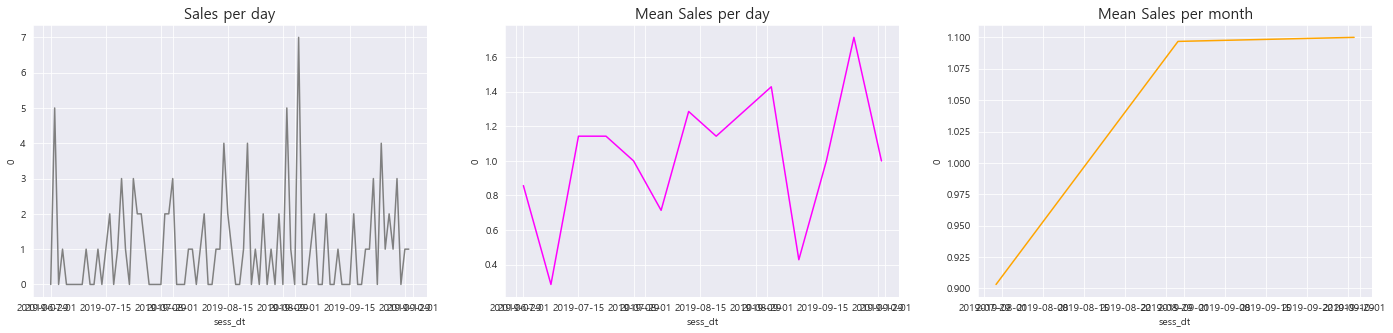

In [160]:
sales_trend("General Bakery Breads")

In [139]:
tmp5 = pd.read_csv('buying_sess_df.csv')

In [142]:
clnt_ids = tmp5[tmp5.buying_sess == 0].clnt_id.unique()

In [148]:
online_df[online_df.clnt_id.isin(clnt_ids)].drop_duplicates(["clnt_id"], keep = "first").clnt_gender.value_counts()

unknown    56900
F           7982
M           1222
Name: clnt_gender, dtype: int64

In [153]:
online_df[online_df.action_type==6][["clnt_id","sess_id","buy_am"]].groupby(["clnt_id","sess_id"]).aggregate(["sum","mean","std","count"])['buy_am'].fillna(0)

sum           mean            std  count
clnt_id sess_id                                               
2       1            -1.0      -1.000000       0.000000      1
        8         18560.0    3712.000000    1121.347412      5
        10         9000.0    9000.000000       0.000000      1
        19        12140.0    4046.666748    1478.862183      3
4       1            -1.0      -1.000000       0.000000      1
9       6         30830.0    3425.555664    2456.135742      9
        26        29100.0    3637.500000    2291.965820      8
12      1            -1.0      -1.000000       0.000000      1
17      3            -1.0      -1.000000       0.000000      1
19      1            -1.0      -1.000000       0.000000      1
20      1            -1.0      -1.000000       0.000000      1
22      4            -1.0      -1.000000       0.000000      1
23      1            -1.0      -1.000000       0.000000      1
        2            -1.0      -1.000000       0.000000      1
        6         27000.0   27000.000000       0.000000      1
        8            -1.0      -1.000000       0.000000      1
        9            -1.0      -1.000000       0.000000      1
        10           -1.0      -1.000000       0.000000      1
        21           -1.0      -1.000000       0.000000      1
24      5         38730.0    4303.333496    2930.029785      9
        15        72400.0    9050.000000   16269.744141      8
29      8            -1.0      -1.000000       0.000000      1
37      1            -1.0      -1.000000       0.000000      1
38      5            -1.0      -1.000000       0.000000      1
40      15           -1.0      -1.000000       0.000000      1
        28        65999.0   21999.666016   19053.136719      3
        33        97500.0   97500.000000       0.000000      1
        37       328000.0  164000.000000  162634.562500      2
        38           -1.0      -1.000000       0.000000      1
        50           -1.0      -1.000000       0.000000      1
...                   ...            ...            ...    ...
72356   153          -2.0      -1.000000       0.000000      2
        154        5600.0    5600.000000       0.000000      1
        155          -1.0      -1.000000       0.000000      1
        160          -1.0      -1.000000       0.000000      1
        170          -1.0      -1.000000       0.000000      1
72361   8            -1.0      -1.000000       0.000000      1
        11           -2.0      -1.000000       0.000000      2
        14           -1.0      -1.000000       0.000000      1
72373   13       222200.0  111100.000000  157119.125000      2
        48           -1.0      -1.000000       0.000000      1
        49        75900.0   75900.000000       0.000000      1
        54       449000.0  449000.000000       0.000000      1
        59        56460.0   28230.000000   16362.450195      2
72375   1            -1.0      -1.000000       0.000000      1
72379   1            -1.0      -1.000000       0.000000      1
72383   3            -2.0      -1.000000       0.000000      2
        5            -1.0      -1.000000       0.000000      1
72388   2            -1.0      -1.000000       0.000000      1
72400   4         30000.0   30000.000000       0.000000      1
        5            -1.0      -1.000000       0.000000      1
        7         78900.0   78900.000000       0.000000      1
72410   3         14470.0   14470.000000       0.000000      1
72415   1            -2.0      -1.000000       0.000000      2
        5            -1.0      -1.000000       0.000000      1
        11           -1.0      -1.000000       0.000000      1
72418   3            -1.0      -1.000000       0.000000      1
72419   1            -1.0      -1.000000       0.000000      1
72423   1        479700.0  479700.000000       0.000000      1
72424   2         34800.0   17400.000000    3535.533936      2
72427   3            -1.0      -1.000000       0.000000      1

[47407 rows x 4 columns]